In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import optimize
%matplotlib inline

In [26]:
data = np.loadtxt('logistic_regression_data.csv', delimiter=',', dtype=np.float64)
X,y = data[:, :-1], data[:,-1].reshape((-1,1))

<Axes: >

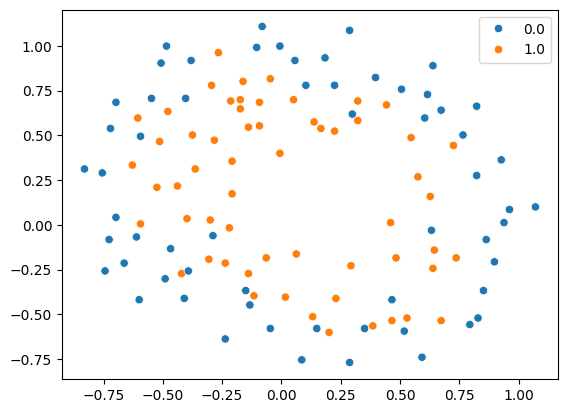

In [27]:
sns.scatterplot(x = X[:,0], y = X[:,1], hue = y.flatten())

Sigmoid function

In [28]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

Cross entropy loss function

In [29]:
def loss(theta, X, y):
    h = sigmoid(np.dot(X, theta))
    cos = -(np.sum(y * np.log(h)) + np.sum((1 - y) * np.log(1-h))) / len(y)

    return cos

gradient

In [30]:
def grad(theta, X, y):
    h = sigmoid(np.dot(X, theta))
    grad = np.dot(X.T, (h - y)) /len(y)

    return grad

Feature trick

In [31]:
def expand_feature(x1, x2, power = 2):
    #expand a 2D feature matrix to polynimial features up to the power
    new_x = np.ones((x1.shape[0], 1))
    for i in range(1, power + 1):
        for j in range(i + 1):
            new_x = np.append(new_x, (x1**(i-j)*(x2**j)).reshape(-1, 1), axis = 1)
    return new_x

In [32]:
def predict(theta, X):
    return (sigmoid(np.dot(X, theta)) > 0.5).flatten()

Gradient descent

In [33]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)      
    costs = [] 
    
    for _ in range(num_iters):  
        h = sigmoid(np.dot(X, theta))
        theta -= alpha * np.dot(X.T, (h - y))/m
        costs.append(loss(theta, X, y))
    return theta, costs

Logistic regression

In [34]:
def logistic_regression(X, y, power = 2, alpha = 0.01, num_iters = 100):
    X = expand_feature(X[:, 0], X[:, 1], power = power)
    theta = np.zeros((X.shape[1], 1), dtype = np.float64)
    theta, costs = gradient_descent(X, y, theta, alpha, num_iters)
    predicted = predict(theta, X)
    return predicted, theta, costs

In [35]:
power, num_iters = 20, 20000
predicted, theta, costs = logistic_regression(X, y, power = power, alpha = 0.6, num_iters = num_iters)

In [36]:
print('The accuracy is {:.2f} %'.format(sum(predicted == y.flatten())/len(y)*100))


The accuracy is 85.59 %


Vizualizing the classifier

C:\Users\Surbhit Kumar\AppData\Local\Temp\ipykernel_13348\3331938992.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  z[i,j] = np.dot(expand_feature(u[i].reshape(1,-1),v[j].reshape(1,-1), power = power),theta)


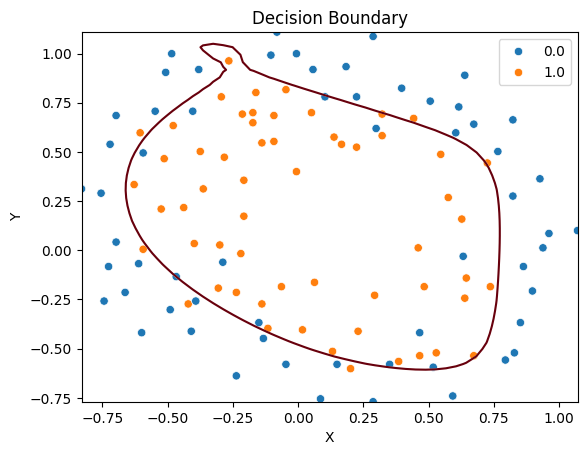

In [37]:
u = np.linspace(min(X[:, 0]),max(X[:, 0]), 50)  
v = np.linspace(min(X[:, 1]),max(X[:, 1]), 50)

z = np.zeros((len(u),len(v)))

for i in range(len(u)):
        for j in range(len(v)):
            z[i,j] = np.dot(expand_feature(u[i].reshape(1,-1),v[j].reshape(1,-1), power = power),theta)   
z = np.transpose(z)

plt.contour(u,v,z,[0,0.01], cmap = "Reds")   
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = y.flatten())
plt.title('Decision Boundary')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

With Regularization

Cost function

In [38]:
#Regularization term lam * np.sum(theta1 * theta1)/len(y) is added to the cost function
def cost_reg(theta, X, y, lam = 0):
    h = sigmoid(np.dot(X, theta))
    theta1 = theta.copy()  
    theta1[0] = 0  
    cos = -(np.sum(y * np.log(h)) + np.sum((1 - y) * np.log(1 - h)))/len(y) + lam * np.sum(theta1 * theta1)/len(y)
    return cos

Gradient

In [39]:
def grad_reg(theta, X, y, lam = 0):
    h = sigmoid(np.dot(X, theta))
    theta1 = theta.copy()  
    theta1[0] = 0  
    grad = (np.dot(X.T, (h - y)) + 2 * lam * theta1)/len(y)
    return grad

Gradient Descent

In [40]:
def gradient_descent_reg(X, y, theta, alpha, lam = 0, num_iters = 100):
    m = len(y)      
    costs = [] 
    
    for _ in range(num_iters):  
        h = sigmoid(np.dot(X, theta))
        theta1 = theta.copy()  
        theta1[0] = 0  
        theta -= alpha * (np.dot(X.T, (h - y)) + 2 * lam * theta1)/m
        costs.append(cost_reg(theta, X, y))
    return theta, costs

Logistic Regression

In [41]:
def logistic_regression_reg(X, y, power = 2, alpha = 0.01, lam = 0, num_iters = 100):
    X = expand_feature(X[:, 0], X[:, 1], power = power)
    theta = np.zeros((X.shape[1], 1), dtype = np.float64)
    theta, costs = gradient_descent_reg(X, y, theta, alpha, lam, num_iters)
    predicted = predict(theta, X)
    return predicted, theta, costs

In [42]:
power, num_iters = 20, 20000
lam = 0.01
predicted, theta, costs = logistic_regression_reg(X, y, power = power, alpha = 0.6, lam = lam, num_iters = num_iters)

In [44]:
print('The accuracy is {:.2f} %'.format(sum(predicted == y.flatten())/len(y)*100))


The accuracy is 83.90 %


C:\Users\Surbhit Kumar\AppData\Local\Temp\ipykernel_13348\3331938992.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  z[i,j] = np.dot(expand_feature(u[i].reshape(1,-1),v[j].reshape(1,-1), power = power),theta)


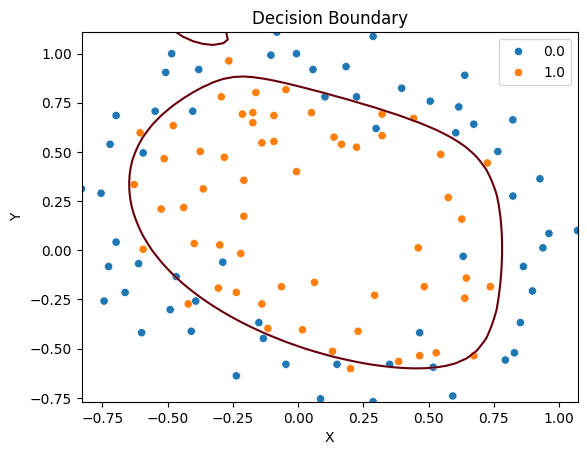

In [43]:
u = np.linspace(min(X[:, 0]),max(X[:, 0]), 50)  
v = np.linspace(min(X[:, 1]),max(X[:, 1]), 50)

z = np.zeros((len(u),len(v)))

for i in range(len(u)):
        for j in range(len(v)):
            z[i,j] = np.dot(expand_feature(u[i].reshape(1,-1),v[j].reshape(1,-1), power = power),theta)   
z = np.transpose(z)

plt.contour(u,v,z,[0,0.01], cmap = "Reds")   
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = y.flatten())
plt.title('Decision Boundary')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()